# Laboratori 4B - Wavelets

### Nom i cognom: David Morillo Massagué (1666540)

L'objectiu d'aquest laboratori és veure com les wavelets es poden fer servir per comprimir imatges


In [71]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]

In [72]:
cube = skimage.io.imread('https://sp.apolloboxassets.com/vendor/product/productImages/2023-03-22/MeMxpArray_11.jpg', as_gray = True)

cube = skimage.util.img_as_ubyte(cube)

En continuació tens la descomposició d'una imatge en wavelets. Els coeffcients es poden visualitzar de manera jeràrquica en una matriu de les mateixes dimensions que la imatge original (semblant als coefficients de Fourier).

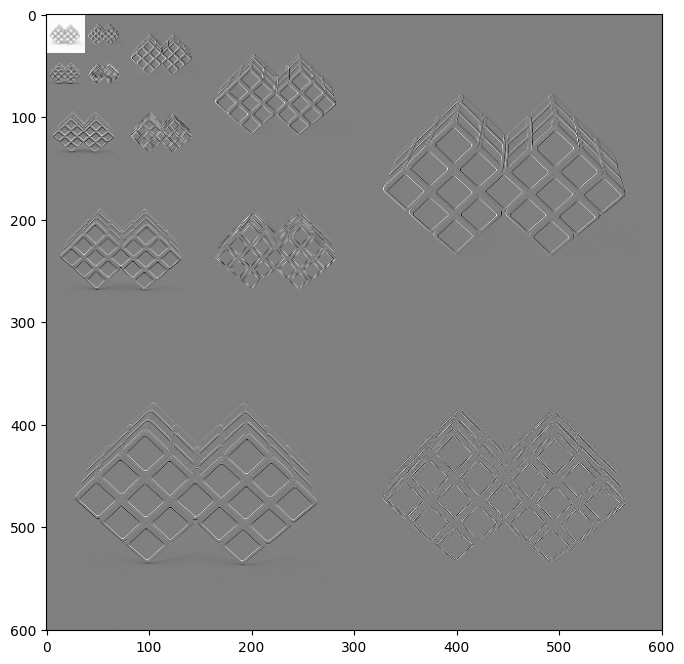

In [73]:
## Wavelet decomposition (4 level)
n = 4
w = 'db1'
coeffs = pywt.wavedec2(cube,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max() 
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)


plt.imshow(arr,cmap='gray')#,vmin=-0.25,vmax=0.75)
plt.show()

Tornem a calcular els coefficients perquè els necessitarem sense normalitzar per poder recuperar la imatge. Podeu experimentar amb altres wavelets i altres nivells. La llista de wavelets es pot trobar a https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families

In [74]:
## Wavelet decomposition (5 level)
n = 5
w = 'haar'
coeffs = pywt.wavedec2(cube,wavelet=w,level=n)

Ordenem els coefficients per poder escollir només els més importants per comprimir la imatge. 

In [75]:
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

En continuació visualitzem el resultat de fer servir només el 10%, 5%, 1% o 0.5% de tots els coefficients.

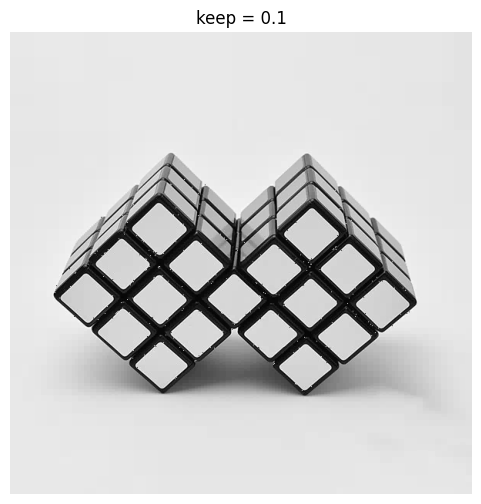

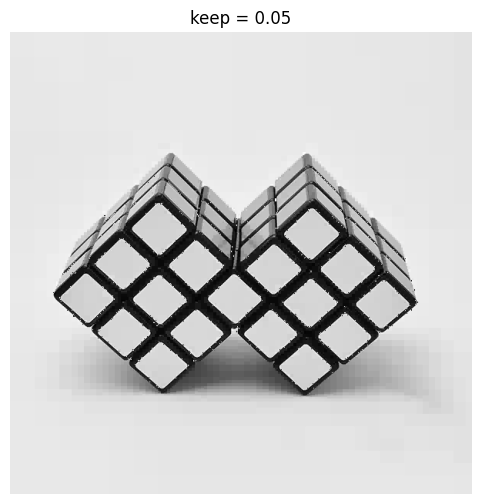

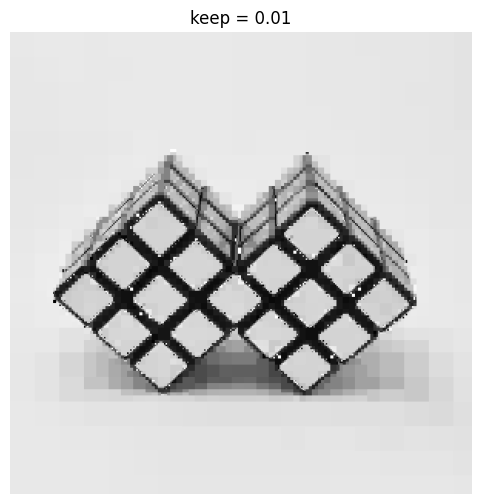

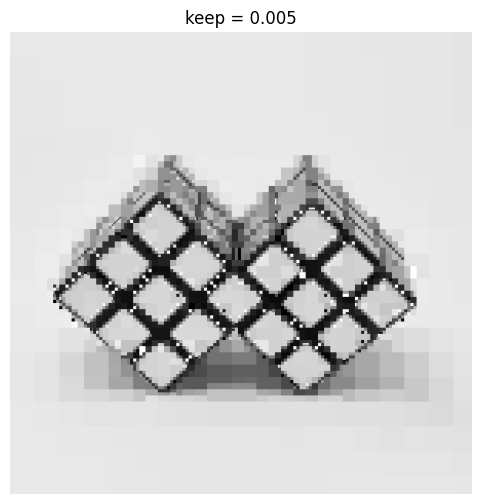

In [76]:
plt.rcParams['figure.figsize'] = [6, 6]

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))


## Tasca única

Genera una animació com la que vam fer per a la transformada de Fourier que ensenya quina part de la imatge s'està afegint cada cop que afegim més coefficients a la representació. En cas de les wavelets els canvis seran molt locals, per tant per fer l'animació més ràpida afegeix uns 1000 coefficients a la vegada.

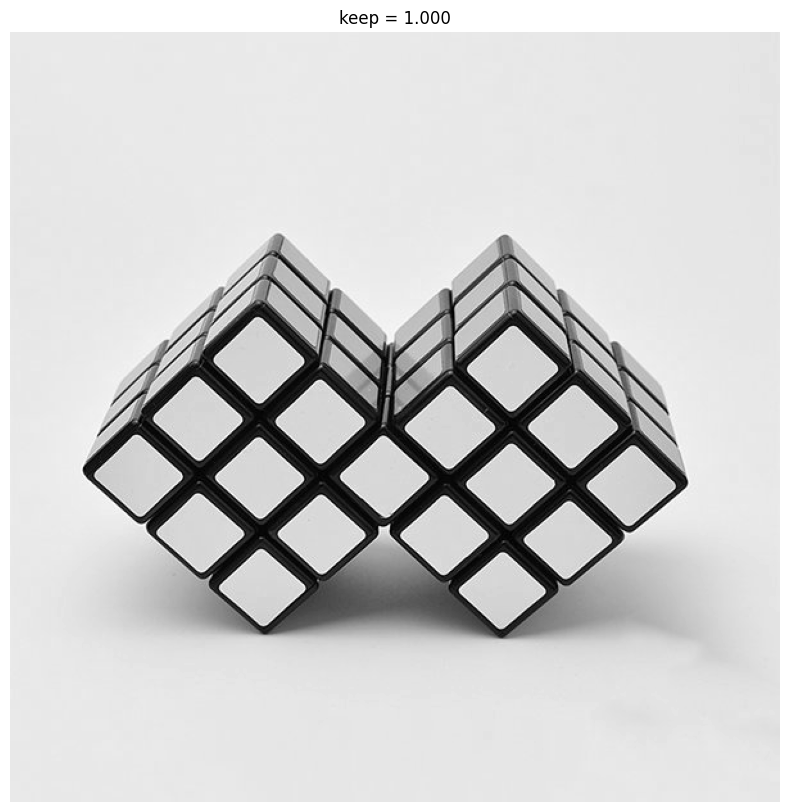

In [77]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [10, 10]

keep_values = [1/n for n in range(1, 200, 2)] # Generem 100 frames

def update(frame):
    plt.clf() # Nou frame
    keep = keep_values[frame]

    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind

    coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format='wavedec2')

    Arecon = pywt.waverec2(coeffs_filt, wavelet=w)
    plt.imshow(Arecon.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title('keep = {:.3f}'.format(keep))

ani = FuncAnimation(plt.figure(), update, frames=len(keep_values), repeat=False) # Animació de matplotlib

HTML(ani.to_html5_video()) # Per a poder visualitzar-ho
